In [1]:
import math
import numpy as np
import pandas as pd
import ipywidgets as widgets
from IPython.core.debugger import set_trace
#from ipywidgets import interact, interact_manual
from IPython.display import display, HTML, Markdown, Latex
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("error")


In [2]:
%matplotlib notebook
plt.rcParams['figure.figsize'] = [8, 6]


In [4]:
csv_file = 'attenStatistics.csv'

df = pd.read_csv(csv_file, comment='#')
df

,DacMode,Channel,SClk,CycleLen,WavFreq,CoarseGain,FineGain,Vpp
0,8,1,8000000000,800000,10000,26,0,0.000000
1,8,1,8000000000,800000,10000,26,4,0.007267
2,8,1,8000000000,800000,10000,26,8,0.014599
3,8,1,8000000000,800000,10000,26,12,0.021855
4,8,1,8000000000,800000,10000,26,16,0.029114
5,8,1,8000000000,800000,10000,26,20,0.036430
6,8,1,8000000000,800000,10000,26,24,0.043756
7,8,1,8000000000,800000,10000,26,28,0.051007
8,8,1,8000000000,800000,10000,26,32,0.058264
9,8,1,8000000000,800000,10000,26,36,0.065611


SelectMultiple(description='Coarse Gain', index=(0,), options=(26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15,…

Button(description='Plot', style=ButtonStyle(), tooltip='Plot the measured Vpp as a function of the fine gain'…

<IPython.core.display.Javascript object>


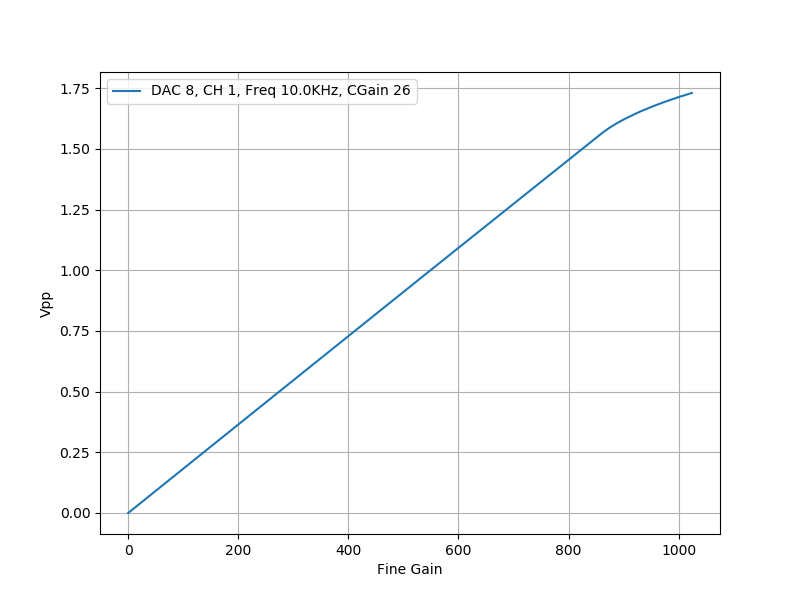

In [3]:
csv_file = 'attenStatistics.csv'

df = pd.read_csv(csv_file, comment='#')

dac_modes = df.DacMode.unique()
channels = df.Channel.unique()
wav_freqs = df.WavFreq.unique()
coarse_gains = df.CoarseGain.unique()

sel_dac_modes = []
dac_modes_widget = None

def on_select_dac_mode(arg):
    global sel_dac_modes
    global dac_modes_widget
    if dac_modes_widget is not None:
        sel_dac_modes = dac_modes_widget.value

if len(dac_modes) == 1:
    sel_dac_modes = [dac_modes[0]]
else:
    sel_dac_modes = [dac_modes[0]]
    dac_modes_widget = widgets.SelectMultiple(
        options=dac_modes,
        value=[dac_modes[0]],
        #rows=10,
        description='DAC Mode',
        disabled=False
    )
    dac_modes_widget.observe(on_select_dac_mode)
    display(dac_modes_widget)
    
sel_channels = []
sel_chan_widget = None

def on_select_channel(arg):
    global sel_channels
    global sel_chan_widget
    if sel_chan_widget is not None:
        sel_channels = sel_chan_widget.value

if len(channels) == 1:
    sel_channels = [channels[0]]
else:
    sel_channels = [channels[0]]
    sel_chan_widget = widgets.SelectMultiple(
        options=channels,
        value=[channels[0]],
        #rows=10,
        description='Channel')
    sel_chan_widget.observe(on_select_channel)
    display(sel_chan_widget)


sel_wav_freqs = []
wav_freqs_widget = None

def on_select_wav_freq(arg):
    global sel_wav_freqs
    global wav_freqs_widget
    if wav_freqs_widget is not None:
        sel_wav_freqs = wav_freqs_widget.value
    

if len(wav_freqs) == 1:
    sel_wav_freqs = [wav_freqs[0]]
else:
    sel_wav_freqs = [wav_freqs[0]]
    wav_freqs_widget = widgets.SelectMultiple(
        options=wav_freqs,
        value=[wav_freqs[0]],
        rows=min(len(wav_freqs), 10),
        description='Wave Freq')
    wav_freqs_widget.observe(on_select_wav_freq)
    display(wav_freqs_widget)

sel_coarse_gains = []
coarse_gain_widget = None

def on_select_coarse_gain(arg):
    global sel_coarse_gains
    global coarse_gain_widget
    #print('arg: {0}'.format(arg))
    #print('coarse_gain_widget: {0}'.format(coarse_gain_widget))
    #print('value: {0}'.format(coarse_gain_widget.value))
    
    if coarse_gain_widget is not None:
        sel_coarse_gains = coarse_gain_widget.value

if len(coarse_gains) == 1:
    sel_coarse_gains = [coarse_gains[0]]
else:
    sel_coarse_gains = [coarse_gains[0]]
    coarse_gain_widget = widgets.SelectMultiple(
        options=coarse_gains,
        value=[coarse_gains[0]],
        rows=min(len(coarse_gains), 10),
        description='Coarse Gain',
        disabled=False
    )
    coarse_gain_widget.observe(on_select_coarse_gain)
    display(coarse_gain_widget)
    
plot_button = widgets.Button(
    description='Plot',
    disabled=False,
    button_style='', # 'success', 'info', 'warning', 'danger' or ''
    tooltip='Plot the measured Vpp as a function of the fine gain'
)

def plot_selected_data(arg=None):
    global df
    global sel_dac_modes
    global sel_channels
    global sel_wav_freqs
    global sel_coarse_gains
        
    fig1 = plt.figure(1)
    ax = fig1.gca()
    ax.clear()
    
    if not sel_dac_modes:
        return
    elif not sel_channels:
        return
    elif not sel_wav_freqs:
        return
    elif not sel_coarse_gains:
        return
    
    #conf = zip(sel_coarse_gains, sel_dac_modes, sel_wav_freqs, sel_channels)
    legend = []
    
    for cgain in sel_coarse_gains:
        for dacmode in sel_dac_modes:
            for wavfreq in sel_wav_freqs:
                for chan in sel_channels:
                    query_str = \
                        'DacMode=="{0}" & Channel=="{1}" & ' + \
                        'WavFreq=="{2}" & CoarseGain=="{3}"'
                    query_str = query_str.format(dacmode, chan, wavfreq, cgain)
                    #print('query_str = \'{0}\''.format(query_str))
                    data = df.query(query_str)
                    ax.plot(data.FineGain, data.Vpp)
                    lstr = []
                    lstr.append('DAC {0}'.format(dacmode))
                    lstr.append('CH {0}'.format(chan))
                    lstr.append('Freq {0}KHz'.format(wavfreq / 1000))
                    lstr.append('CGain {0}'.format(cgain))
                    legend.append(', '.join(lstr))
    ax.legend(legend)
    ax.set_xlabel('Fine Gain')
    ax.set_ylabel('Vpp')
    ax.grid(True)
    plt.show

plot_button.on_click(plot_selected_data)
display(plot_button)

plot_selected_data()
    